<a href="https://colab.research.google.com/github/jini-ninii/ML_labs/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
!pip install pandas seaborn scikit-learn

# Домашнее задание про практике 2

- Провести разведочный анализ EDA (описать полученный результат). Тут важно, влияет ли X[i] на Y (примеры в практике 2)
- Описать полученный результат относительно анализа целевой перменной и зависимой (см. практика 2)
- Подобороться с пропусками в данных (при наличии в датасете). Объяснить способ выборка борьбы с пропуском
- Обучить модель линейной регресии на всей выборке X, y. Вывести метрики
- Сделать train_test_split и обучить на обучающей выборке. Предсказать результат на обучающей и тестовой выборках. Вывести метрики, объяснить полученный результат

In [207]:
import pandas as pd

In [208]:
df = pd.read_csv('/content/Coffe_sales.csv')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [210]:
columns_to_category = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

for columns in columns_to_category:
  df[columns] = df[columns].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   hour_of_day  3547 non-null   int64   
 1   cash_type    3547 non-null   category
 2   money        3547 non-null   float64 
 3   coffee_name  3547 non-null   category
 4   Time_of_Day  3547 non-null   category
 5   Weekday      3547 non-null   category
 6   Month_name   3547 non-null   category
 7   Weekdaysort  3547 non-null   int64   
 8   Monthsort    3547 non-null   int64   
 9   Date         3547 non-null   object  
 10  Time         3547 non-null   object  
dtypes: category(5), float64(1), int64(3), object(2)
memory usage: 185.0+ KB


In [211]:
y = df['money']
x = df.drop('money', axis=1) if 'money' in df.columns else df

In [212]:
x.head(n=5)

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [213]:
y.head(n=5)

,money
0,38.7
1,38.7
2,38.7
3,28.9
4,38.7


## EDA (разведочный анализ относительно целевой переменной)

в этом же блоке побороться с проусками, важно сделать именно после разведочного анализа
- Y и категориальные
- Y и числовые
- Описать все полученные результаты в своем блоке

- Отобрать признаки для дальнейшего анализа, записать в ```best_features```

In [214]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

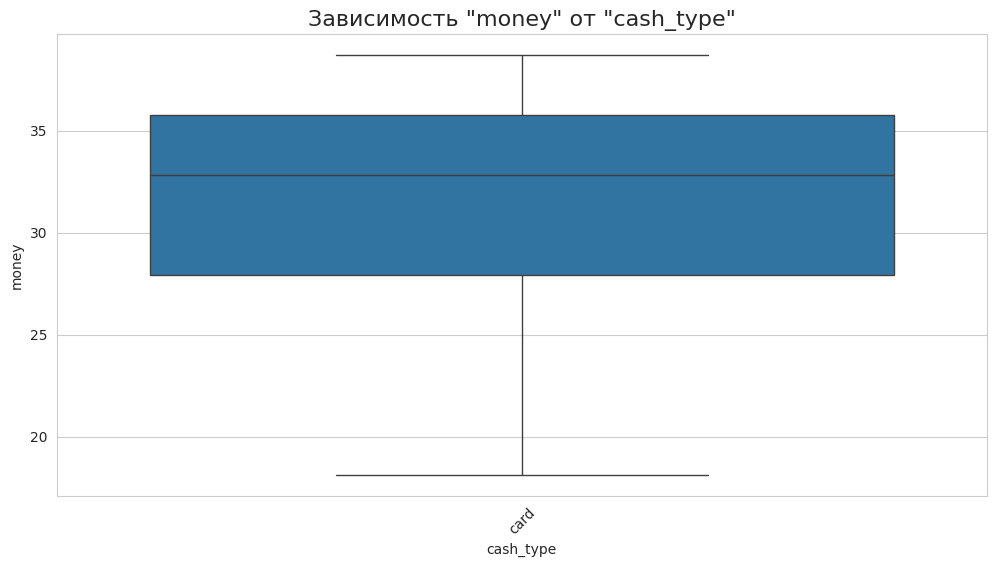

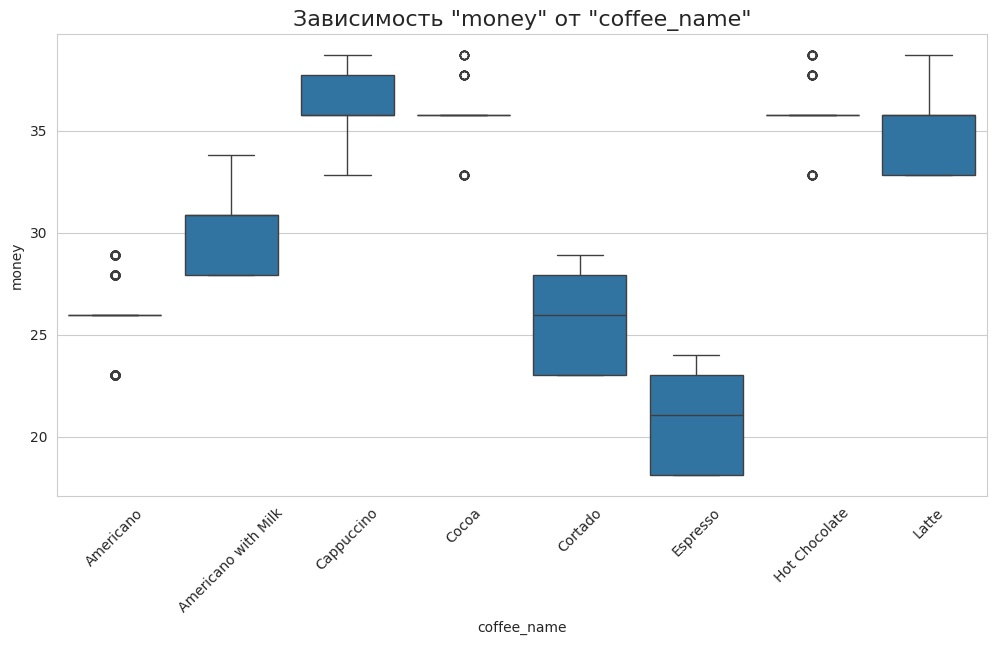

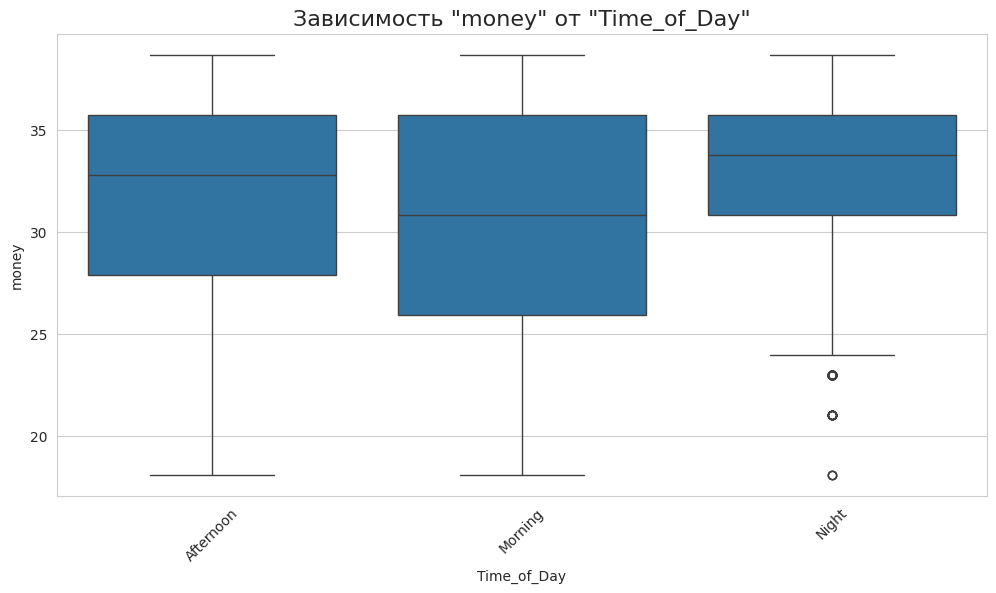

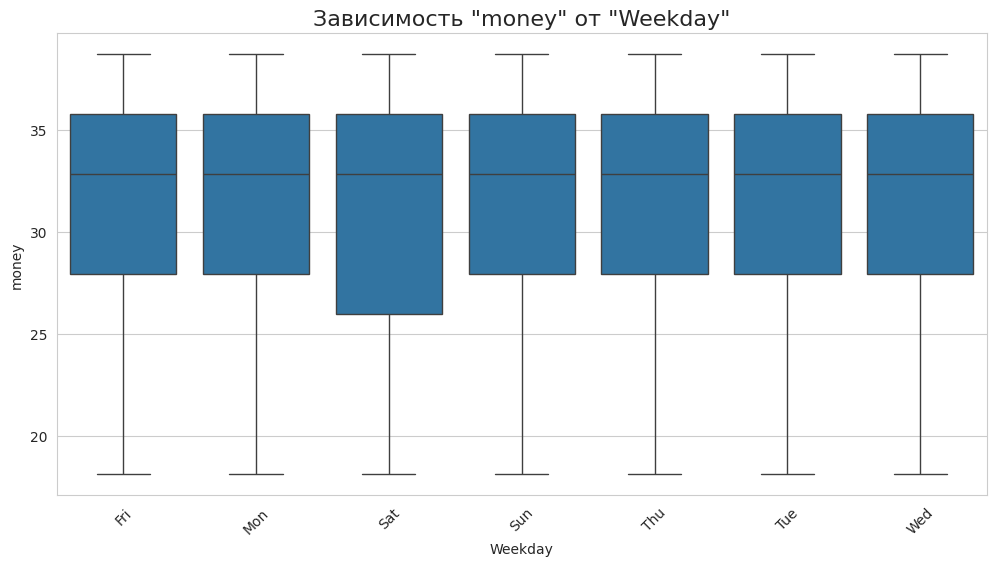

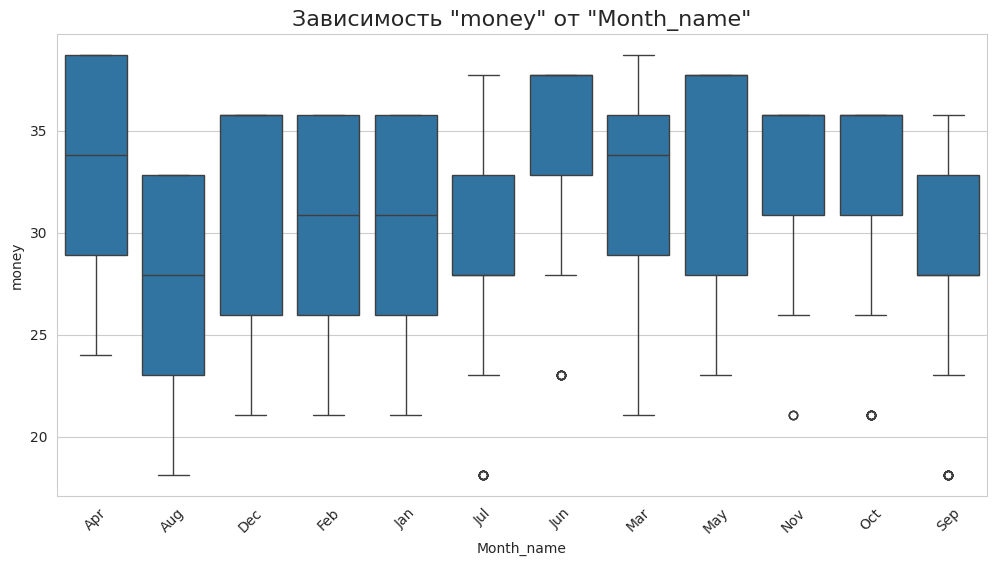

In [215]:
# Y и категориальные

categorical_features = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']

for feature in categorical_features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=feature, y=y, data=df)
    plt.title(f'Зависимость "money" от "{feature}"', fontsize=16)
    plt.xticks(rotation=45)
    plt.show()

Анализ категориальных признаков показал, что наиболее сильное влияние оказывает coffee_name.

Умеренное, но значимое влияние продемонстрировали Month_name и Time_of_Day.

Остальные бесполезны либо малоинформативны.

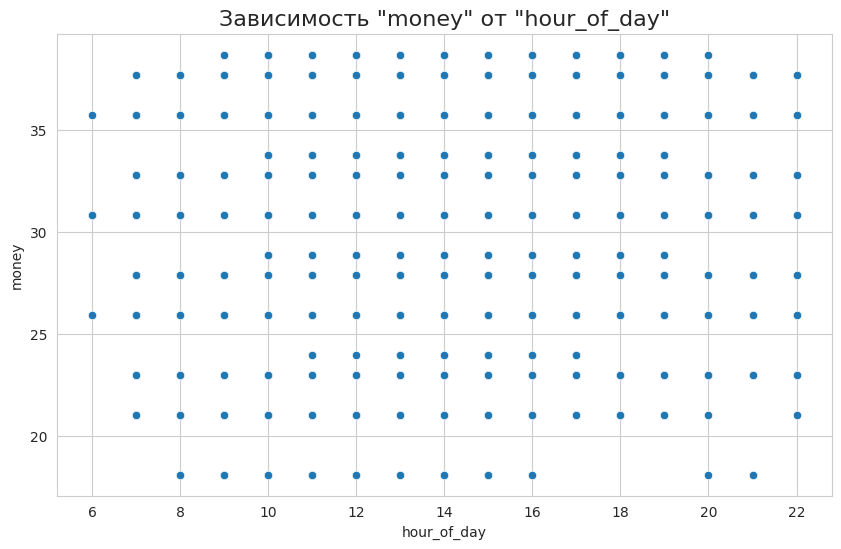

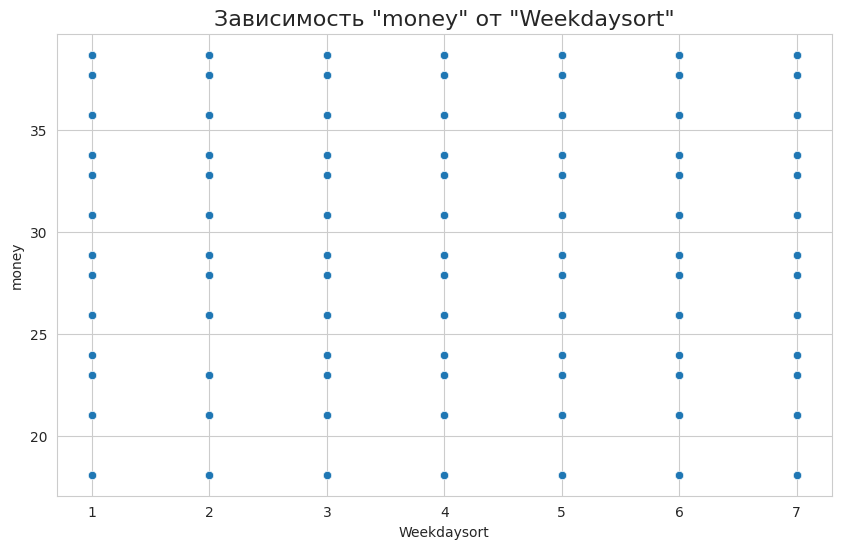

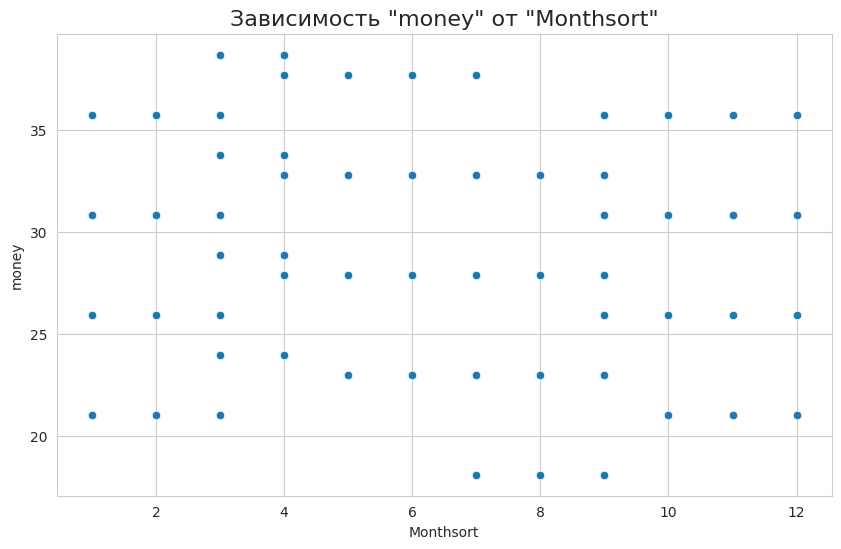

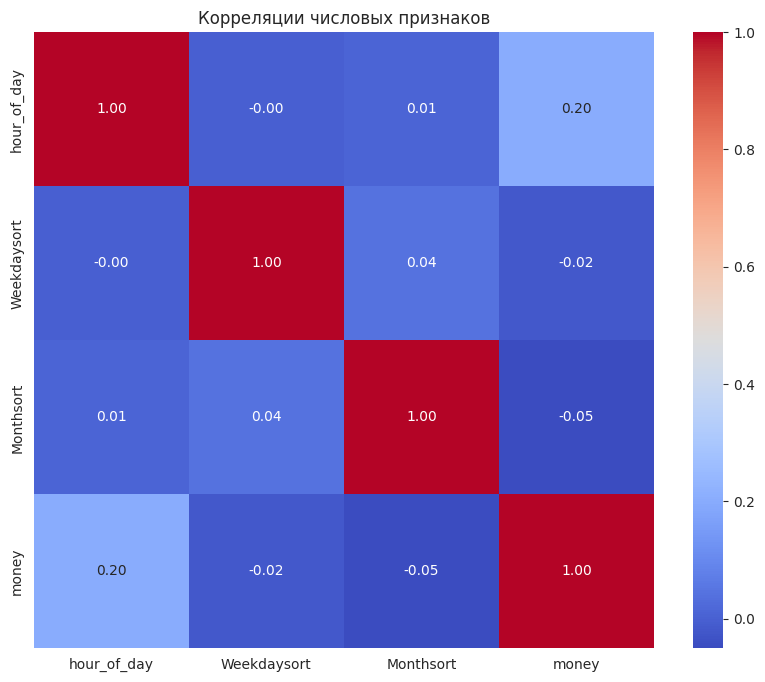

In [216]:
#Y и числовые

# scatterplot

numeric_features = ['hour_of_day', 'Weekdaysort', 'Monthsort']

for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y=y, data=df)
    plt.title(f'Зависимость "money" от "{feature}"', fontsize=16)
    plt.show()

# Корреляция

plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_features + ['money']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Корреляции числовых признаков')
plt.show()

Анализ числовых признаков показал отсутствие линейной зависимости.

Признаки не показали значимой связи, кроме, возможно, hour_of_day. Попробуем использовать его.

In [217]:
categorial_features = ['coffee_name', 'Time_of_Day', 'Month_name']
numeric_features = ['hour_of_day']
best_features = categorial_features + numeric_features

x_best = df[best_features]

print(best_features)

['coffee_name', 'Time_of_Day', 'Month_name', 'hour_of_day']


На основе анализа были отобраны признаки, показавшие наибольшее влияние на целевую переменную: ['coffee_name', 'Month_name', 'Time_of_Day', 'hour_of_day'].

Остальные признаки были исключены как малоинформативные, избыточные или константные.

In [218]:
x.head(n=5)

,hour_of_day,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


## Моделирование

**Общая задача:**
Сравнить несколько вариантов линейной регрессии на датасете (с предобработкой признаков: стандартизация числовых, OneHot/Label для категориальных).

**предобработка**
- Категориальные признаки преобразовать с помощью OneHotEncoder (если признак является типом **bool** по логике можно интерпретировать как (true, false) То можно LabelEncoder)
- Числовые признаки записать в `X_scaled` и провести стандартизацию с помощью `StandardScaler`. Желательно без категориальных признаков


---
**Метрики**: (MAE, MAPE, R², MSE, RMSE)

---

**Модель 1.**

- Использовать **все признаки (кроме y)**.
- Обучить на **всей выборке** (без разделения).
- Сделать предсказания на этой же выборке.
- Вывести метрики и интерпретировать.
- Построить график коэффициентов (model.coef\_ vs X\_scaled.columns) и интерпретировать.

---

**Модель 2.**

- Использовать **все признаки**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 3.**

- Использовать только **best\_features** (отобранные признаки).
- Обучить на **всей выборке**.
- Предсказать на всей выборке.
- Вывести метрики качества и интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

**Модель 4.**

- Использовать **best\_features**.
- Сделать `train_test_split`.
- Обучить на `X_train`, предсказать на `X_train` и `X_test`.
- Вывести метрики качества для обучающей и тестовой выборки, интерпретировать.
- Визуализировать коэффициенты и интерпретировать.

---

P.S.
- Важно не забывать о стандартизации и разделении категориальных признаков на отдельные олонки
- Все примеры есть в практике 2


P.S.S
Старайтесь делать собственные предположения, ChatGPT задачу решит, но вы не добьетесь понимания полученных результатов

---
В результате должно получиться 4 модели

- первые две на всех колонках (фичах)
- последующие на отобранных фичах (колонках)

## Ниже представлены подсказки, то что нужно использовать и как должно называться

## Модель 1

### Преобразование категориальных

In [219]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

x1 = x.copy()
x1 = x1.drop(columns=['Date', 'Time'], axis=1)

categorical_features_all = x1.select_dtypes(include=['category']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(x1[categorical_features_all])
x_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features_all))
x1 = x1.drop(columns=categorical_features_all, axis=1)
x1 = pd.concat([x1.reset_index(drop=True), x_encoded.reset_index(drop=True)], axis=1)

In [220]:
x1.head()

,hour_of_day,Weekdaysort,Monthsort,cash_type_card,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,...,Month_name_Dec,Month_name_Feb,Month_name_Jan,Month_name_Jul,Month_name_Jun,Month_name_Mar,Month_name_May,Month_name_Nov,Month_name_Oct,Month_name_Sep
0,10,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,12,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,13,5,3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,13,5,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Преобразование числовых

In [221]:
from sklearn.preprocessing import StandardScaler

numeric_features_all = x1.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
x_scaled = x1.copy()
x_scaled[numeric_features_all] = scaler.fit_transform(x_scaled[numeric_features_all])

In [222]:
x_scaled.head()

,hour_of_day,Weekdaysort,Monthsort,cash_type_card,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,...,Month_name_Dec,Month_name_Feb,Month_name_Jan,Month_name_Jul,Month_name_Jun,Month_name_Mar,Month_name_May,Month_name_Nov,Month_name_Oct,Month_name_Sep
0,-0.988751,0.585532,-0.986757,0.0,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,...,-0.280662,-0.367972,-0.245095,-0.267584,-0.259013,2.485993,-0.269996,-0.280662,-0.369452,-0.327718
1,-0.516319,0.585532,-0.986757,0.0,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,...,-0.280662,-0.367972,-0.245095,-0.267584,-0.259013,2.485993,-0.269996,-0.280662,-0.369452,-0.327718
2,-0.516319,0.585532,-0.986757,0.0,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,...,-0.280662,-0.367972,-0.245095,-0.267584,-0.259013,2.485993,-0.269996,-0.280662,-0.369452,-0.327718
3,-0.280103,0.585532,-0.986757,0.0,2.299784,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,...,-0.280662,-0.367972,-0.245095,-0.267584,-0.259013,2.485993,-0.269996,-0.280662,-0.369452,-0.327718
4,-0.280103,0.585532,-0.986757,0.0,-0.434823,-0.543573,-0.398462,-0.268792,-0.29671,-0.194271,...,-0.280662,-0.367972,-0.245095,-0.267584,-0.259013,2.485993,-0.269996,-0.280662,-0.369452,-0.327718


### Модель 1

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

model1 = LinearRegression()
model1.fit(x_scaled, y)
y_pred1 = model1.predict(x_scaled)

mae = mean_absolute_error(y, y_pred1)
mse = mean_squared_error(y, y_pred1)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred1)
mape = mean_absolute_percentage_error(y, y_pred1)

print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

MAE: 0.3781
MAPE: 0.0123
MSE: 0.5324
RMSE: 0.7296
R^2: 0.9776


Визуализируем:

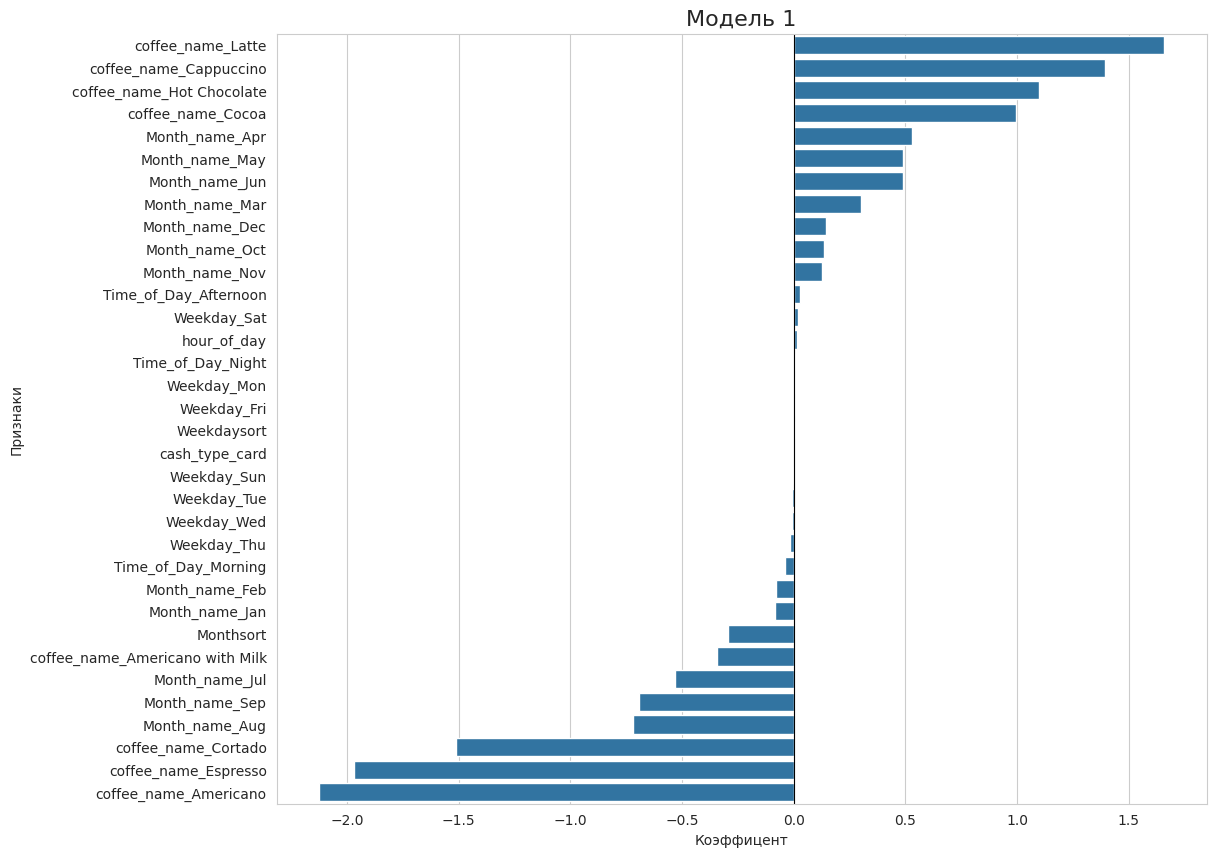

In [224]:
coeffs = pd.DataFrame({
    'Признаки': x_scaled.columns,
    'Коэффицент': model1.coef_
}).sort_values(by='Коэффицент', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Коэффицент', y='Признаки', data=coeffs)
plt.title('Модель 1', fontsize=16)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.show()

Самые большие положительные коэффициенты (сильнее всего увеличивают цену) у Латте и Капучино. Самые большие отрицательные коэффициенты (сильнее всего уменьшают цену) у Американо и Эспрессо.

Практически нулевые признаки, как было понятно еще на этапе EDA - бесполезны для предсказания цены. Зависимость от названия кофе очень сильная.

## Модель 2

### Разделение на обучающую, тестовую

In [225]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

### Модель 2

In [226]:
model2 = LinearRegression()
model2.fit(x_train, y_train)

LinearRegression()

In [227]:
y_pred_train2 = model2.predict(x_train)
y_pred_test2 = model2.predict(x_test)

def print_metrics(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print(f"MAE:  {mae:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R^2:  {r2:.4f}\n")

print_metrics(y_train, y_pred_train2, "обучающей")
print_metrics(y_test, y_pred_test2, "тестовой")

MAE:  0.3817
MAPE: 0.0124
MSE: 0.5324
RMSE: 0.7297
R^2:  0.9778

MAE:  0.3782
MAPE: 0.0120
MSE: 0.5372
RMSE: 0.7330
R^2:  0.9765



Визуализируем:

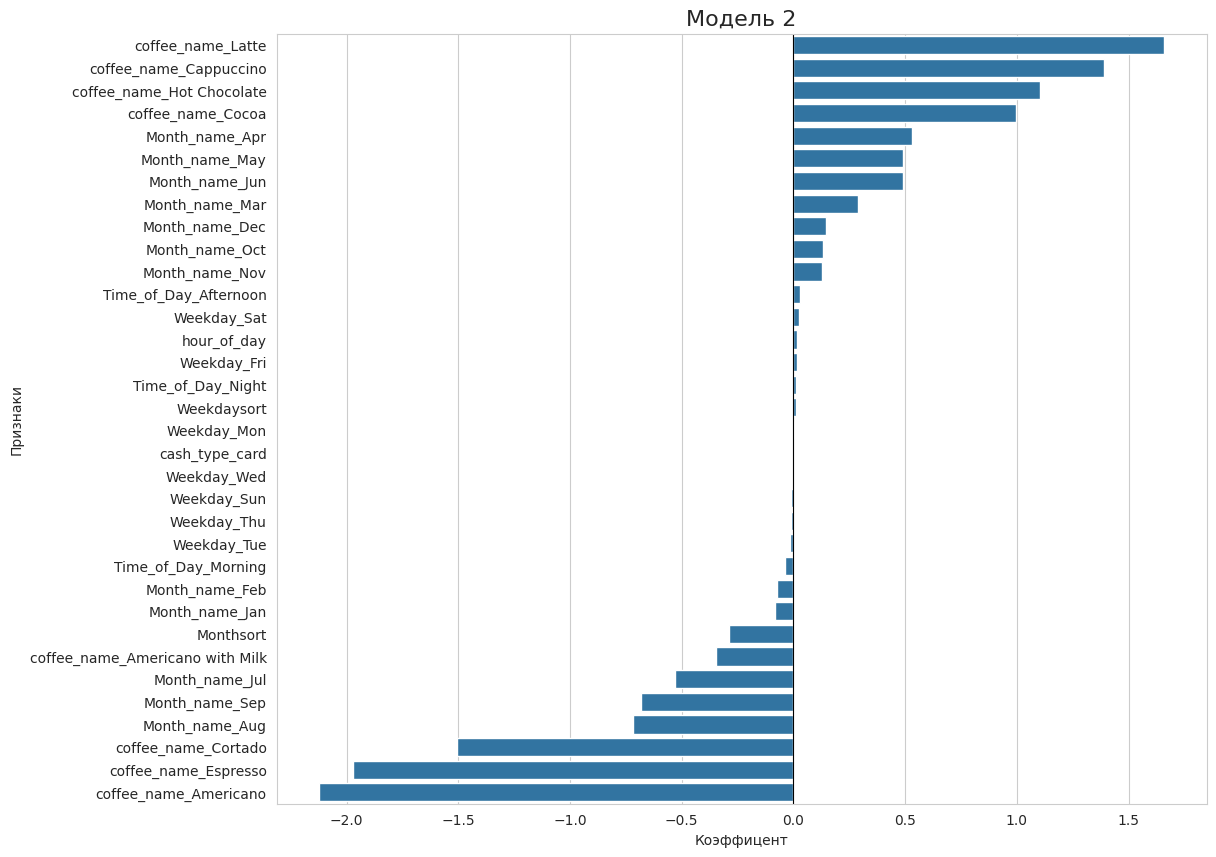

In [228]:
coeffs2 = pd.DataFrame({
    'Признаки': x_scaled.columns,
    'Коэффицент': model2.coef_
}).sort_values(by='Коэффицент', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Коэффицент', y='Признаки', data=coeffs2)
plt.title('Модель 2', fontsize=16)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.show()

Картина практически идентична Модели 1.

## Модель 3

Создадим новый датафрейм x3, копию best_features:

In [229]:
x3 = x[best_features].copy()
x3.head()

,coffee_name,Time_of_Day,Month_name,hour_of_day
0,Latte,Morning,Mar,10
1,Hot Chocolate,Afternoon,Mar,12
2,Hot Chocolate,Afternoon,Mar,12
3,Americano,Afternoon,Mar,13
4,Latte,Afternoon,Mar,13


Организуем преобразования, как в Модели 1:

In [230]:
categorical_features_best = x3.select_dtypes(include=['category']).columns.tolist()
numeric_features_best = x3.select_dtypes(include=['int64']).columns.tolist()

# Категориальные

encoder3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data3 = encoder3.fit_transform(x3[categorical_features_best])
x_encoded3 = pd.DataFrame(encoded_data3, columns=encoder3.get_feature_names_out(categorical_features_best))

# Числовые

scaler3 = StandardScaler()
scaled_numeric_data3 = scaler3.fit_transform(x3[numeric_features_best])
x_scaled_numeric3 = pd.DataFrame(scaled_numeric_data3, columns=numeric_features_best)

x3_processed = pd.concat([x_scaled_numeric3.reset_index(drop=True), x_encoded3.reset_index(drop=True)], axis=1)
x3_processed.head()

,hour_of_day,coffee_name_Americano,coffee_name_Americano with Milk,coffee_name_Cappuccino,coffee_name_Cocoa,coffee_name_Cortado,coffee_name_Espresso,coffee_name_Hot Chocolate,coffee_name_Latte,Time_of_Day_Afternoon,...,Month_name_Dec,Month_name_Feb,Month_name_Jan,Month_name_Jul,Month_name_Jun,Month_name_Mar,Month_name_May,Month_name_Nov,Month_name_Oct,Month_name_Sep
0,-0.988751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.516319,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.516319,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.280103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.280103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Обучение:

In [231]:
model3 = LinearRegression()
model3.fit(x3_processed, y)
y_pred3 = model3.predict(x3_processed)
print_metrics(y, y_pred3, "best_features")

MAE:  0.3759
MAPE: 0.0122
MSE: 0.5334
RMSE: 0.7303
R^2:  0.9776



Визуализация:

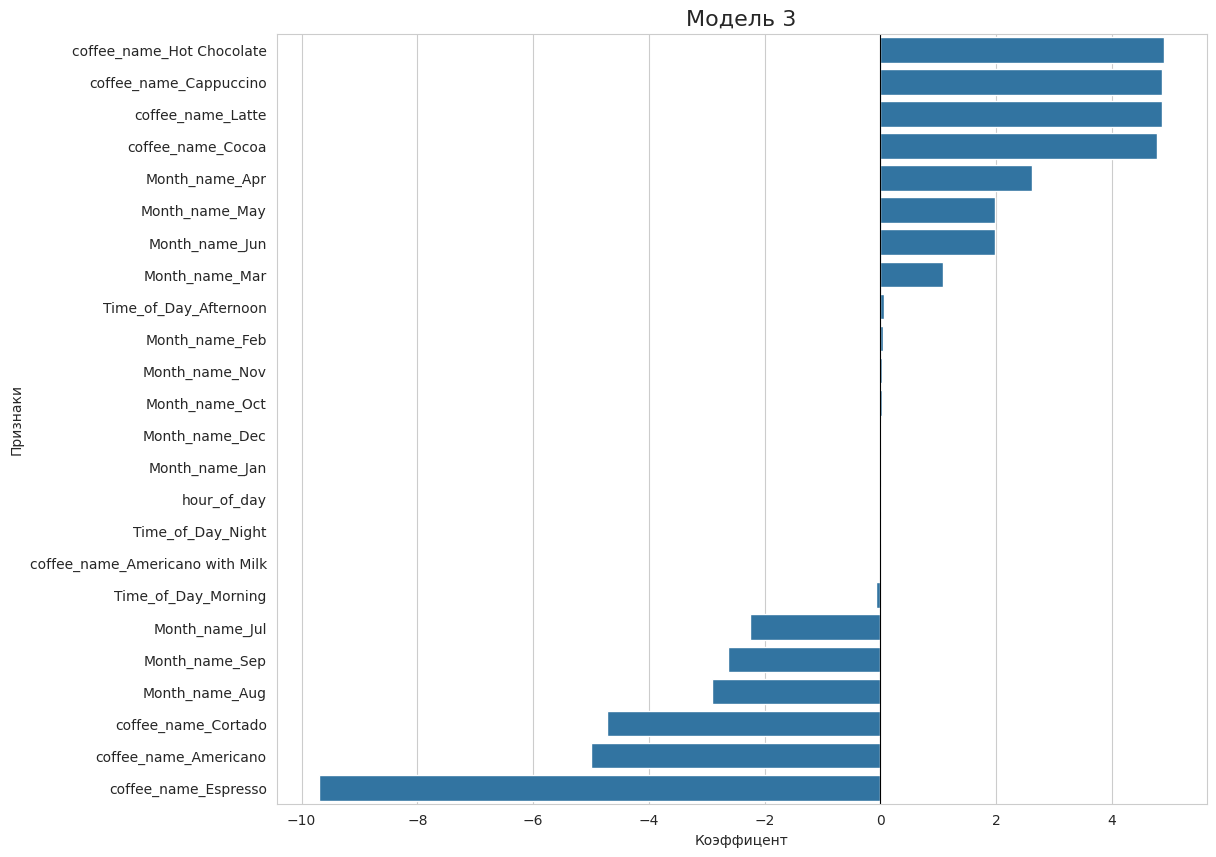

In [232]:
coeffs3 = pd.DataFrame({
    'Признаки': x3_processed.columns,
    'Коэффицент': model3.coef_
}).sort_values(by='Коэффицент', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Коэффицент', y='Признаки', data=coeffs3)
plt.title('Модель 3', fontsize=16)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.show()

Коэффиценты выросли, самые важные фичи получили еще больший вес. Вывод - цена на кофе в первую очередь зависит от его названия. Остальные признаки, которые мы оставили, имеют очень незначительное влияние по сравнению с ним.

## Модель 4

### Разделение на обучающую, тестовую

In [233]:
from sklearn.model_selection import train_test_split

x_train4, x_test4, y_train4, y_test4 = train_test_split(x3_processed, y, test_size=0.2, random_state=42)

### Модель 4

In [234]:
model4 = LinearRegression()
model4.fit(x_train4, y_train4)

LinearRegression()

In [235]:
y_pred_train4 = model4.predict(x_train4)
y_pred_test4 = model4.predict(x_test4)

print_metrics(y_train4, y_pred_train4, "Обучение")
print_metrics(y_test4, y_pred_test4, "Тест")

MAE:  0.3787
MAPE: 0.0123
MSE: 0.5342
RMSE: 0.7309
R^2:  0.9777

MAE:  0.3739
MAPE: 0.0119
MSE: 0.5335
RMSE: 0.7304
R^2:  0.9767



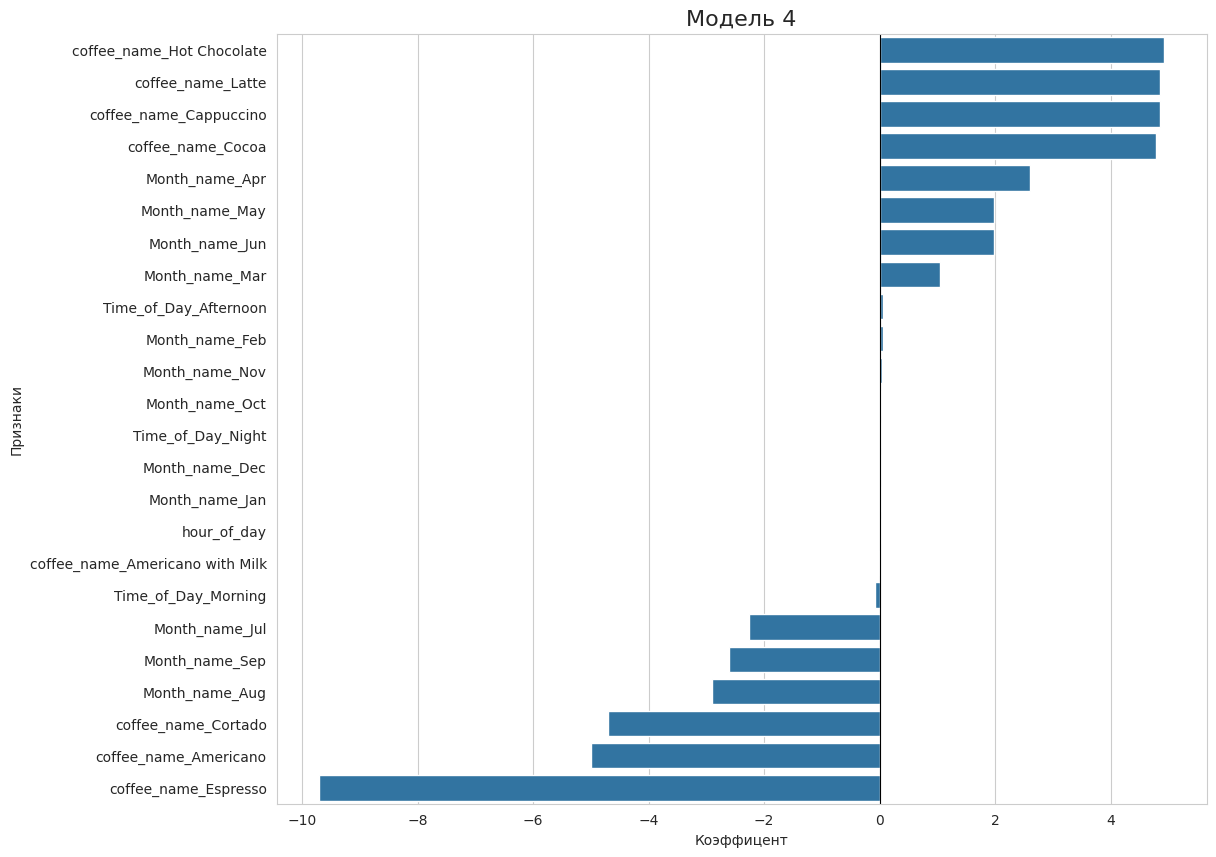

In [236]:
coeffs4 = pd.DataFrame({
    'Признаки': x3_processed.columns,
    'Коэффицент': model4.coef_
}).sort_values(by='Коэффицент', ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(x='Коэффицент', y='Признаки', data=coeffs4)
plt.title('Модель 4', fontsize=16)
plt.axvline(x=0, color='black', linewidth=0.8)
plt.show()

В очередной раз можно сделать вывод, что доходы практически полностью определяются названием напитка (и немного - месяцем). Сложная модель, использующая все исходные признаки, не имеет никаких преимуществ перед упрощенной моделью, построенной только на признаках, отобранных в ходе разведочного анализа.